In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
s = pd.Series([-1, -2, -3, 0, 3 ,4])
s

0   -1
1   -2
2   -3
3    0
4    3
5    4
dtype: int64

In [200]:
s + 100

0     99
1     98
2     97
3    100
4    103
5    104
dtype: int64

In [201]:
s < 0 

0     True
1     True
2     True
3    False
4    False
5    False
dtype: bool

In [202]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [203]:
s2.loc["alice"]
s2.iloc[0]
s.loc[0]

-1

In [204]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [205]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

In [206]:
print(s2.keys())
print(s3.keys())
s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

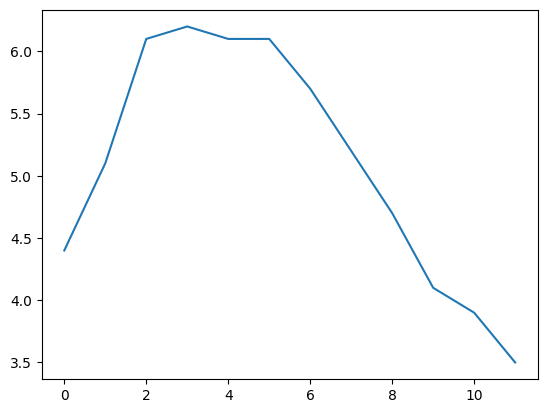

In [207]:
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

In [208]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [209]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

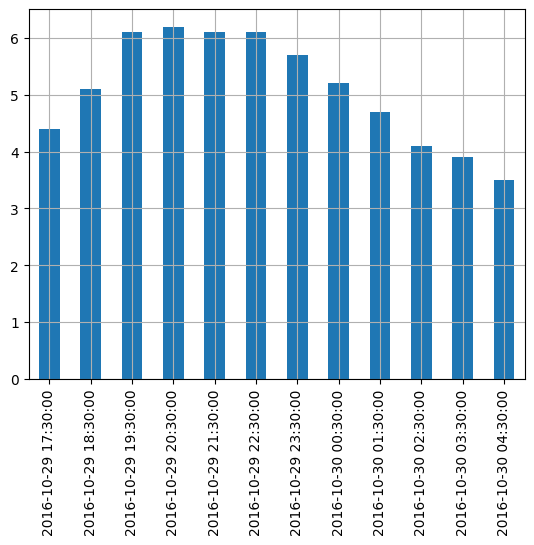

In [210]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

In [211]:
temp_series_freq_2H = temp_series.resample("2H").mean()
temp_series_freq_2H

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64

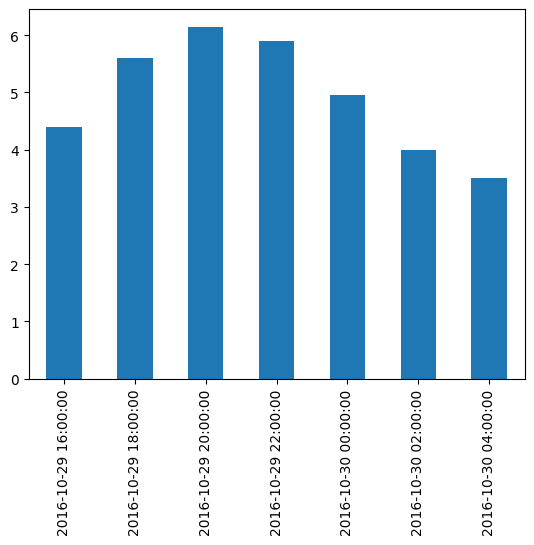

In [212]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

In [213]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [214]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

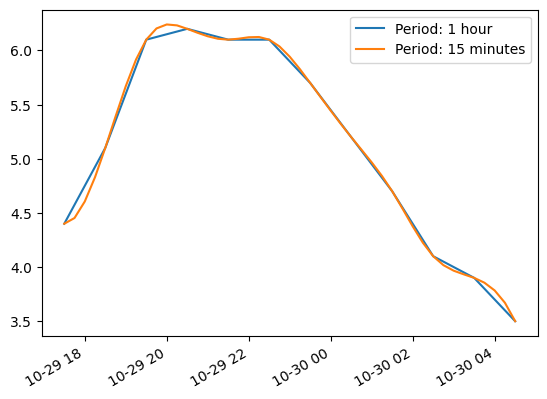

In [215]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

In [216]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]')

In [217]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [218]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [219]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [220]:
masked_array = np.ma.asarray(values, dtype=object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


In [221]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


In [222]:
people = pd.DataFrame({
    "birthyear": {"alice": 1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice": "Biking", "bob": "Dancing"},
    "weight": {"alice": 68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [223]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"): 1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"): "Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"): 68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"): np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [224]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [225]:
d5["public", "hobby"]  # Same result as d5["public"]["hobby"]

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

In [226]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

In [227]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

In [228]:
d7 = d6.stack()
d7

London    Paris
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
children  bob        NaN      3.0
          charles    0.0      NaN

In [229]:
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

In [230]:
d9 = d8.unstack()
d9

London  alice    birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        bob      birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        charles  birthyear       1992
                 children         0.0
                 hobby            NaN
                 weight           112
Paris   alice    birthyear       1985
                 children         NaN
                 hobby         Biking
                 weight            68
        bob      birthyear       1984
                 children         3.0
                 hobby        Dancing
                 weight            83
        charles  birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
dtype: object

In [231]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [232]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [233]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [234]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [235]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


In [236]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [237]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [238]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene": 1})  # alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


In [239]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


In [240]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [241]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


In [242]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


In [243]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


In [244]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

In [245]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,33,True,NaN,22.985398
bob,Dancing,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


In [246]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [247]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


In [248]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
alice,Biking,172,68,33,True,NaN,22.985398,False


In [249]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


In [250]:
people.sort_values(by="age", inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,26,32.724617,185,NaN,False,True,5.0,112
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83


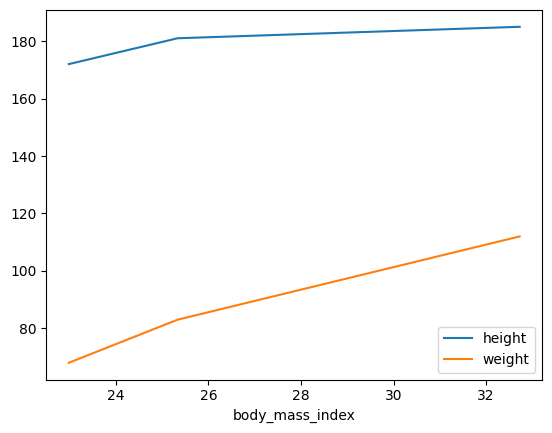

In [251]:
people.sort_values(by="body_mass_index", inplace=True)
people.plot(kind="line", x="body_mass_index", y=["height", "weight"])
plt.show()

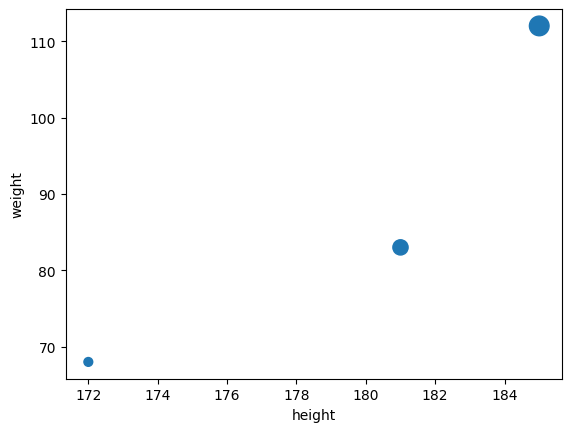

In [252]:
people.plot(kind="scatter", x="height", y="weight", s=[40, 120, 200])
plt.show()

In [253]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice", "bob", "charles", "darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [254]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [256]:
grades + [1, 2, 3] # Broadcasts

,sep,oct,nov
alice,9,10,12
bob,11,11,12
charles,5,10,5
darwin,10,12,13


In [257]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [261]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

In [263]:
grades.mean(axis = 1)

alice      8.333333
bob        9.333333
charles    4.666667
darwin     9.666667
dtype: float64

In [264]:
(grades == 10).any(axis=1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

In [278]:
grades - grades.mean()

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [279]:
bonus_array = np.array([[0, np.nan, 2], [np.nan, 1, 0], [0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob", "colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [282]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [284]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [286]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [287]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [288]:
bonus_points.interpolate(axis = 1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [292]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [294]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [296]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


In [299]:
final_grades_clean = final_grades.dropna(how="all").dropna(how="all", axis=1)
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


In [301]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


In [304]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

In [306]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


In [308]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [310]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


In [311]:
pd.pivot_table(more_grades, index="name")

C:\Users\Simon\AppData\Local\Temp\ipykernel_6028\584684106.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(more_grades, index="name")


,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


In [312]:
pd.pivot_table(more_grades, index="name", values=["grade", "bonus"], aggfunc=np.max)

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


In [315]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


In [316]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

In [317]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3, "some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


In [318]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


In [319]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


In [320]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

In [321]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


In [322]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby", "weight", "birthyear", "children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [323]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

In [324]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()

# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



In [325]:
us_cities = None
try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

,State,Population,lat,lon
City,,,,
Marysville,Washington,63269,48.051764,-122.177082
Perris,California,72326,33.782519,-117.228648
Cleveland,Ohio,390113,41.499320,-81.694361
Worcester,Massachusetts,182544,42.262593,-71.802293
Columbia,South Carolina,133358,34.000710,-81.034814


In [326]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [327]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [328]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


In [332]:
pd.merge(left=city_loc, right=city_pop, on="city", how="outer")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


In [333]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


In [335]:
result_concat = pd.concat([city_loc, city_pop], ignore_index=True)
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


In [337]:
pd.concat([city_loc, city_pop], axis=1) # Raté car cleveland & StanFrancisco même index (3)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In [338]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

,state,lat,lng,population,state
city,,,,,
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


In [339]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


In [342]:
city_eco["economy"] = city_eco["eco_code"].astype('category')
city_eco["economy"].cat.categories

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,17
4,8363710,New York,New-York,17,17
5,413201,Miami,Florida,34,34
6,2242193,Houston,Texas,20,20


In [341]:
city_eco["economy"].cat.categories = ["Finance", "Energy", "Tourism"]
city_eco

C:\Users\Simon\AppData\Local\Temp\ipykernel_6028\2586490918.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  city_eco["economy"].cat.categories = ["Finance", "Energy", "Tourism"]


,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
